## Importing libraries

In [103]:
# math and statistics
import pyreadstat
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
from scipy.stats import shapiro

# visualization
import pylab
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

# neural networks
import keras
import tensorflow as tf
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization, concatenate, AveragePooling2D

## Loading and inspecting data
Inspection consists of:
- Looking at the data records for further understanding
- Observing the unique values for categorical variables
- Checking for missing values
- Checking for duplicate values
- Checking for data type consistency

### Feature description
The dataset consists of 1365 records and 19 columns
- Polio incidence: Total (reported) polio cases
- Tuberculosis incidence: Estimated rate of new tuberculosis cases per 100,000 people. This includes both new and latent reactivated infections.
- Tuberculosis deaths: Estimated mortality from all forms of tuberculosis per 100,000 population.
- Malaria deaths: The number of deaths from malaria per 100,000 people.
- Malaria incidence:  the number of new cases of malaria in a year per 1,000 population at risk.
- Alcohol deaths: Annual number of deaths from alcohol use disorders per 100,000 people.
- Smoking deaths: Deaths that are from all causes attributed to smoking per 100,000 people, in both sexes aged age-standardized
- Obesity deaths: Deaths that are from all causes attributed to high body-mass index per 100,000 people
- Cardiovascular disease deaths: Death rate due to Cardiovascular diseases per 100,000 people
- Cardiovascular disease incidence: Number of new cases of cardiovascular diseases per 100 people
- Deaths by suicide: Annual number of suicides per 100,000 people. Suicide deaths are underreported in many countries due to social stigma and cultural or legal concerns. This data is adjusted for this underreporting to estimate the actual rate of suicides.
- Deaths due to Cardiovascular diseases: Deaths due to cardiovascular diseases per 100,000 people.
- Mean years of schooling: Average number of years adults over 25 years participated in formal education.
- GDP: GDP per capita, PPP (constant 2017 international $)
- Gov health expenditure: Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE) (%)
- Undernourishment: Share of individuals that have a daily food intake that is insufficient to provide the amount of dietary energy required to
maintain a normal, active, and healthy life.

In [104]:
data = pd.read_csv("Country Data.csv")
print("Dataset shape:", data.shape, '\n')
data.info()
print("\nFirst and last five rows:")
display(data.head())
data.tail()

Dataset shape: (2938, 22) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251,11.0,11.2,0.434,9.8


In [105]:
print("Number of unique countries in the dataset:", data['Country'].nunique())
print("Years considered in the dataset:", data['Year'].unique())
print("Possible country statuses:", data['Status'].unique())
print("Number of developing countries:", data[data['Status']=='Developing']['Country'].nunique())
print("Number of developed countries:", data[data['Status']=='Developed']['Country'].nunique())

Number of unique countries in the dataset: 193
Years considered in the dataset: [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]
Possible country statuses: ['Developing' 'Developed']
Number of developing countries: 161
Number of developed countries: 32


In [106]:
print("Number of missing values:")
data.isna().sum()

Number of missing values:


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         444
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [107]:
print("Number of duplicate records =", data.duplicated().sum())

Number of duplicate records = 0


In [108]:
data.dtypes # the population column is detected as a string data type and has to be adjusted

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                          object
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

## Preprocessing data
This preprocessing consists of:
- Fixing the data type issues
- Dropping records with unexpected values
- Dropping features with numerous missing values
- Finally, dropping the remaining records that have missing values

In [109]:
data.loc[:, 'Population'] = ((data['Population'].astype(str)).apply(lambda x: x.replace(',', '') )).astype(float)
data['Population'] = data['Population'].astype(float)
data.columns = data.columns.str.strip()
data = data[~(data['percentage expenditure']== 0)]
# data = data[~(data['Hepatitis B'].isna())]
data = data[data.columns.drop('Hepatitis B')]
data = data[~(data['Population'].isna())]
data = data.dropna()
print("Dataset shape after cleaning:", data.shape)

Dataset shape after cleaning: (2281, 21)


## Descriptive statistics
Inspecting the minimum, maximum, mean, median, quantiles, and standard deviation of the features. 

In [110]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2.281000e+03,2281.000000,2281.000000,2281.000000,2281.000000
mean,2007.020167,69.328496,161.365629,31.908374,4.653262,939.962952,2436.631302,38.162341,44.351162,82.616835,5.888049,82.494520,1.909645,7528.610947,1.232046e+07,4.853617,4.898904,0.629696,12.111925
std,4.309978,9.666254,126.208177,130.098077,4.029802,2211.092482,11367.332628,19.859885,177.145774,23.119286,2.391998,23.459971,5.374625,14476.584040,6.069395e+07,4.542691,4.636901,0.213081,3.311276
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.099872,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.200000,69.000000,0.000000,0.930000,36.199487,0.000000,18.900000,0.000000,78.000000,4.250000,79.000000,0.100000,454.676588,2.163750e+05,1.600000,1.500000,0.491000,10.100000
50%,2007.000000,72.200000,138.000000,3.000000,3.990000,155.195208,15.000000,43.800000,3.000000,93.000000,5.770000,93.000000,0.100000,1741.142552,1.435568e+06,3.300000,3.300000,0.683000,12.400000
75%,2011.000000,75.900000,224.000000,19.000000,7.620000,630.388356,358.000000,56.000000,24.000000,97.000000,7.530000,97.000000,0.900000,5877.876780,6.863157e+06,7.200000,7.200000,0.784000,14.500000
max,2015.000000,89.000000,717.000000,1800.000000,17.870000,19479.911610,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.945000,20.700000


## Switching Dataset

In [111]:
data = pd.read_excel('final_data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1365 non-null   object 
 1   Year                              1365 non-null   int64  
 2   Life expectancy                   1365 non-null   float64
 3   Polio incidence                   1365 non-null   int64  
 4   Tuberculosis deaths               1365 non-null   float64
 5   Tuberculosis incidence            1365 non-null   float64
 6   Malaria deaths                    1365 non-null   int64  
 7   Malaria incidence                 1365 non-null   float64
 8   Alcohol deaths                    1365 non-null   float64
 9   Smoking deaths                    1365 non-null   float64
 10  Obesity deaths                    1365 non-null   float64
 11  Cardiovascular disease incidence  1365 non-null   float64
 12  Cardio

In [112]:
data['Country'].unique().shape

(79,)

## Univariate feature analysis

### Patterns in global scale

#### Global life expectancy

Text(0.5, 1.0, 'Life Expectancy Over the Years')

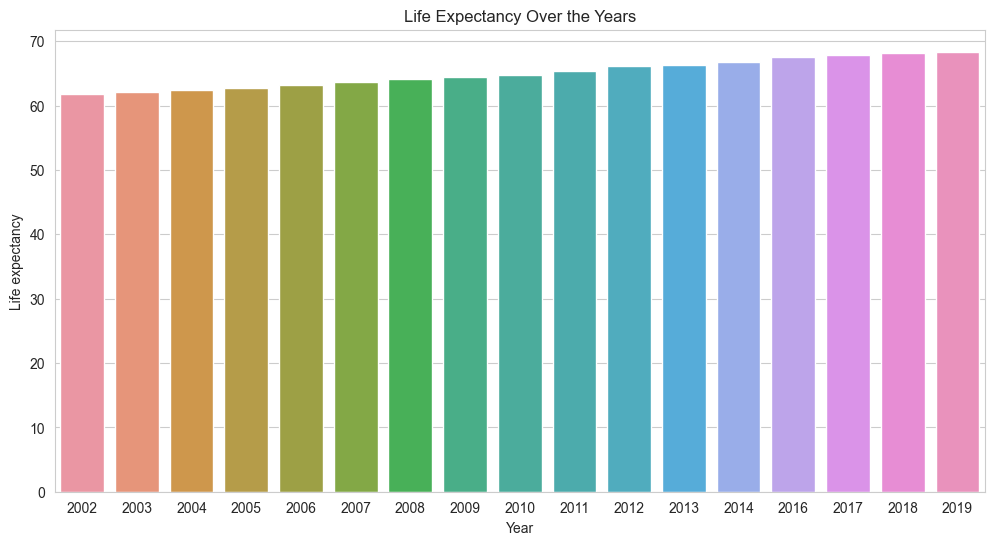

In [113]:
subset = data[data['Year'] != 2015]
subset = subset.groupby(['Year']).mean(numeric_only=True).reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=subset['Year'], y=subset['Life expectancy'], ax=ax);
ax.set_title('Life Expectancy Over the Years')

### Life expectancy histogram

Text(0.5, 1.0, 'Life Expectancy Histogram')

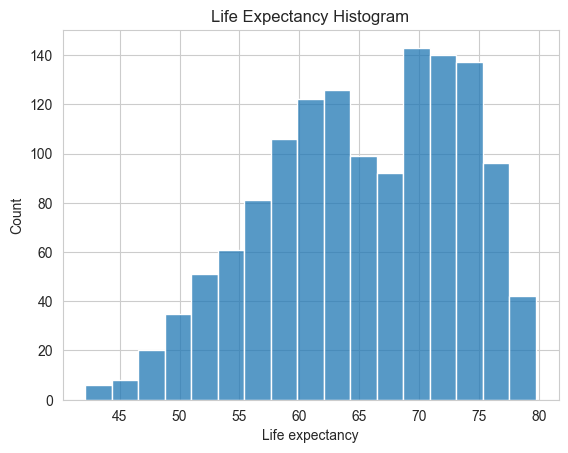

In [114]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Life expectancy', ax=ax)
ax.set_title("Life Expectancy Histogram")

### Polio incidence histogram

Text(0.5, 1.0, 'Polio Incidence Histogram')

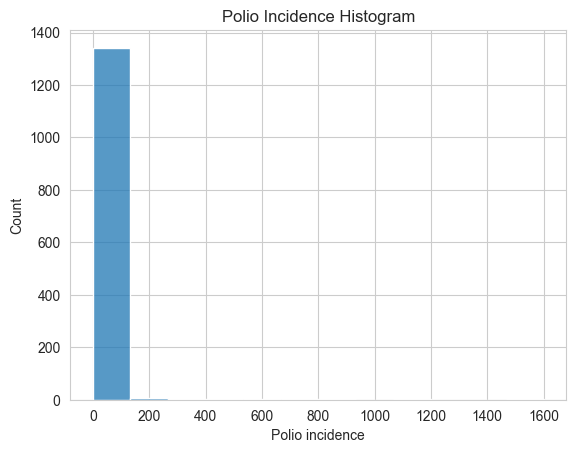

In [115]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Polio incidence', ax=ax)
ax.set_title("Polio Incidence Histogram")

### Alcohol deaths histogram

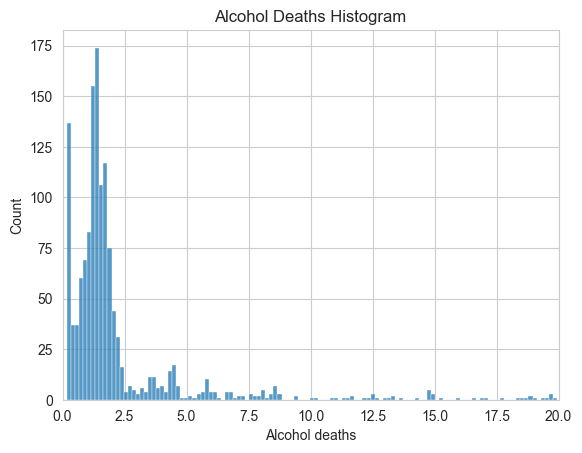

In [116]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Alcohol deaths', ax=ax)
ax.set_xlim(0, 20)
ax.set_title("Alcohol Deaths Histogram");

### Smoking deaths histogram

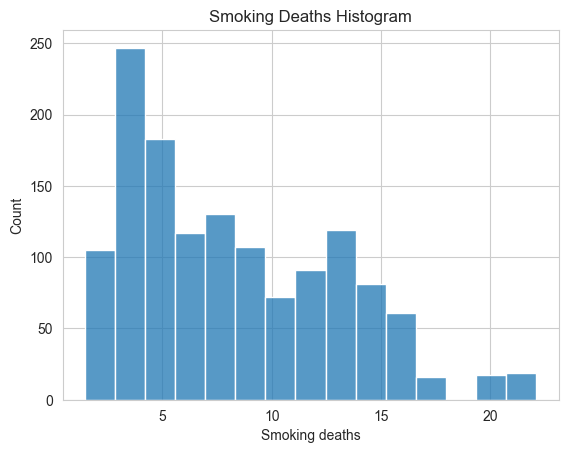

In [117]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Smoking deaths', ax=ax)
ax.set_title("Smoking Deaths Histogram");

### Obesity histogram

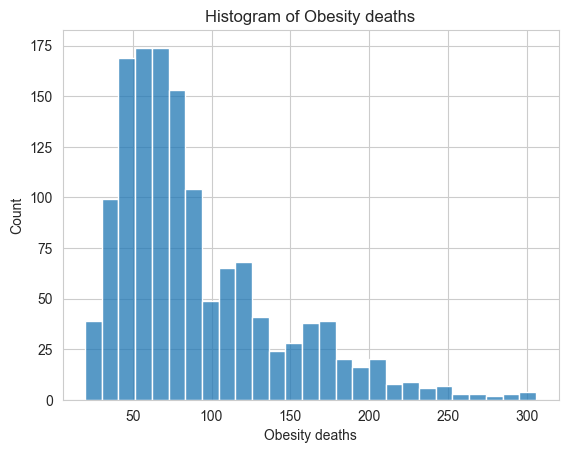

In [118]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Obesity deaths', ax=ax)
ax.set_title("Histogram of Obesity deaths");

### Percentage expenditure histogram

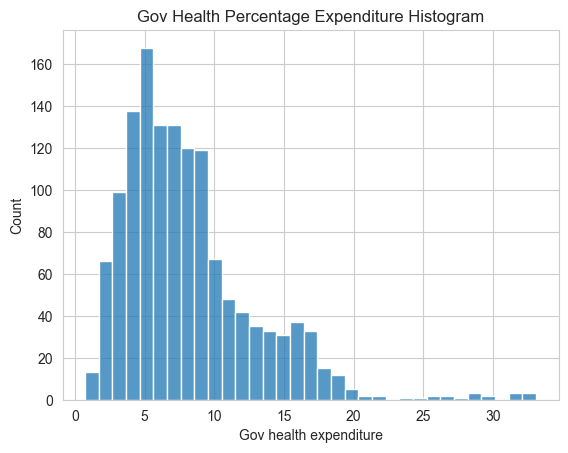

In [119]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Gov health expenditure', ax=ax)
# ax.set_xlim(0, 18)
ax.set_title("Gov health percentage expenditure Histogram".title());


### Polio histogram

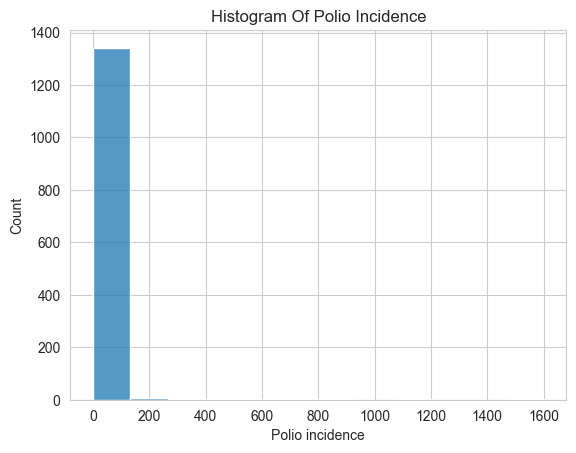

In [120]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Polio incidence', ax=ax)
ax.set_title("Histogram of Polio Incidence".title());

### GDP histogram

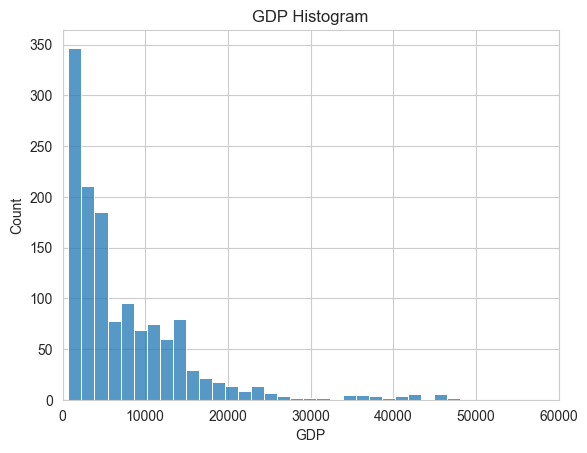

In [121]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='GDP', ax=ax)
ax.set_xlim(0, 60000)
ax.set_title("GDP Histogram");

### Population histogram

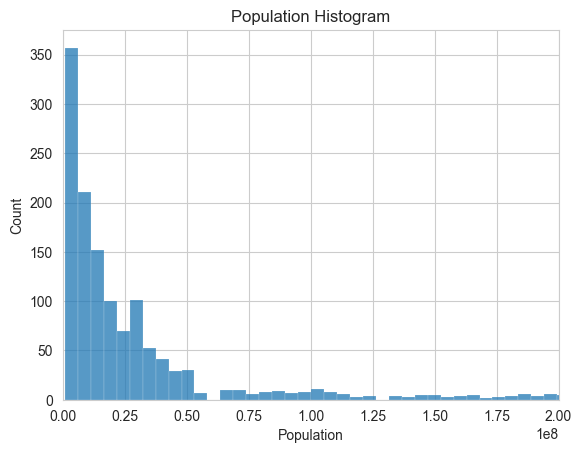

In [122]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Population', ax=ax)
ax.set_xlim(0, 2e8)
ax.set_title("Population Histogram");

### Undernourishment

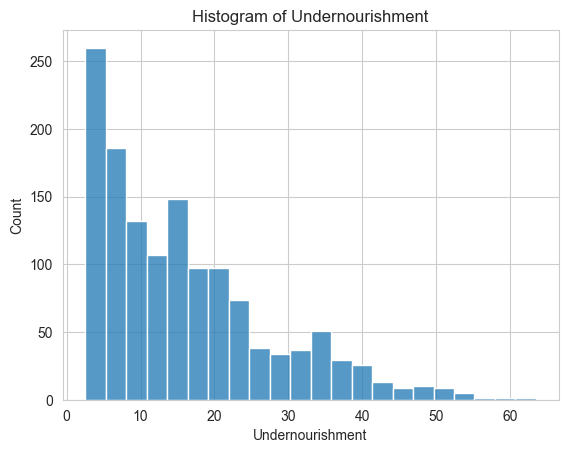

In [123]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='Undernourishment', ax=ax)
ax.set_title("Histogram of Undernourishment");

In [124]:
fig = px.scatter(data, x="Malaria incidence", y="Life expectancy", color="Country")
fig.show()

In [125]:
fig = px.scatter(data, x="Undernourishment", y="Life expectancy", color="Country")
fig.show()

In [126]:
fig = px.scatter(data, x="GDP", y="Life expectancy", color="Country")
fig.show()

In [127]:
fig = px.scatter(data, x="Mean years of schooling", y="Life expectancy", color="Country")
fig.show()

## Correlation

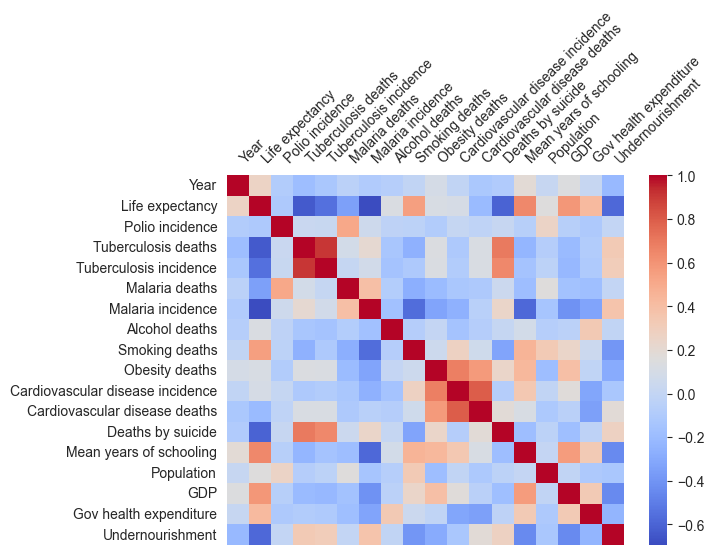

In [128]:
corr_data = data[data.columns.drop(['Country'])]
corr_matrix_all = corr_data.corr()

sns.heatmap(corr_matrix_all, cmap='coolwarm')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha='left');

## Data modeling: Entire dataset

In [129]:
scaler = StandardScaler()
subset = data[data.columns.drop(['Country'])]

x = scaler.fit_transform(subset)
y = x[:, 1]
x = np.delete(x, 1, axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Simple linear regression

In [130]:
model = LinearRegression(n_jobs=-1)
model.fit(xtrain, ytrain)
y_pred_regr = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred_regr)
r2 = r2_score(ytest, y_pred_regr)
print(f"Simple linear regression MSE = {mse}")
print(f"Simple linear regression R2 = {r2}")

x_t = np.c_[xtest[:,0], y_pred_regr, xtest[:, 1:]]
y_pred_regr = scaler.inverse_transform(x_t)
y_pred_regr = y_pred_regr[:, 1]

Simple linear regression MSE = 0.09345939656940468
Simple linear regression R2 = 0.9130129542068294


### PLS Regression

In [131]:
model = PLSRegression(n_components=5)
model.fit(xtrain, ytrain)
y_pred_PLS = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred_PLS)
r2 = r2_score(ytest, y_pred_PLS)
print(f"PLS regression MSE = {mse}")
print(f"PLS regression R2 = {r2}")

x_t = np.c_[xtest[:,0], y_pred_PLS, xtest[:, 1:]]
y_pred_PLS = scaler.inverse_transform(x_t)
y_pred_PLS = y_pred_PLS[:, 1]

PLS regression MSE = 0.09534130073298924
PLS regression R2 = 0.9112613776969755


### Lasso regression

In [132]:
model = Lasso(alpha=0.01)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
y_pred_lasso = preds
print(f"Lasso alpha=0.01 regression MSE = {mse}")
print(f"Lasso alpha=0.01 regression R2 = {r2}")

Lasso alpha=0.01 regression MSE = 0.09439481968780404
Lasso alpha=0.01 regression R2 = 0.9121423120175685


In [133]:
model = Lasso(alpha=0.05)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"Lasso alpha=0.05 regression MSE = {mse}")
print(f"Lasso alpha=0.05 regression R2 = {r2}")

Lasso alpha=0.05 regression MSE = 0.10483809456542494
Lasso alpha=0.05 regression R2 = 0.9024222660579772


In [134]:
model = Lasso(alpha=0.1)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"Lasso alpha=0.1 regression MSE = {mse}")
print(f"Lasso alpha=0.1 regression R2 = {r2}")

Lasso alpha=0.1 regression MSE = 0.13528212206951593
Lasso alpha=0.1 regression R2 = 0.874086581131312


In [135]:
model = Lasso(alpha=0.2)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"Lasso alpha=0.2 regression MSE = {mse}")
print(f"Lasso alpha=0.2 regression R2 = {r2}")

Lasso alpha=0.2 regression MSE = 0.22678502610957596
Lasso alpha=0.2 regression R2 = 0.7889205347399266


In [136]:
model = Lasso(alpha=0.3)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"Lasso alpha=0.3 regression MSE = {mse}")
print(f"Lasso alpha=0.3 regression R2 = {r2}")

Lasso alpha=0.3 regression MSE = 0.3599884145404805
Lasso alpha=0.3 regression R2 = 0.6649418908093521


In [137]:
model = Lasso(alpha=0.6)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"Lasso alpha=0.6 regression MSE = {mse}")
print(f"Lasso alpha=0.6 regression R2 = {r2}")

Lasso alpha=0.6 regression MSE = 0.9553921171485206
Lasso alpha=0.6 regression R2 = 0.11077172659555978


In [138]:
model = Lasso(alpha=1)
model.fit(xtrain, ytrain)
lasso_preds = model.predict(xtest)
mse = mean_squared_error(ytest, lasso_preds)
r2 = r2_score(ytest, lasso_preds)


print(f"Lasso alpha=1 regression MSE = {mse}")
print(f"Lasso alpha=1 regression R2 = {r2}")

x_t = np.c_[xtest[:,0], lasso_preds, xtest[:, 1:]]
lasso_preds = scaler.inverse_transform(x_t)
lasso_preds = lasso_preds[:, 1]

Lasso alpha=1 regression MSE = 1.075970593946631
Lasso alpha=1 regression R2 = -0.0014563196781913756


### Ridge regression

In [139]:
model = Ridge()
model.fit(xtrain, ytrain)
ridge_preds = model.predict(xtest)
mse = mean_squared_error(ytest, ridge_preds)
r2 = r2_score(ytest, ridge_preds)

print(f"Ridge regression MSE = {mse}")
print(f"Ridge regression R2 = {r2}")

x_t = np.c_[xtest[:,0], ridge_preds, xtest[:, 1:]]
ridge_preds = scaler.inverse_transform(x_t)
ridge_preds = ridge_preds[:, 1]

Ridge regression MSE = 0.0934512735873681
Ridge regression R2 = 0.9130205146473664


### KNN regression (non-linear)

In [140]:
# standardized dataset
model = KNeighborsRegressor(n_neighbors=2)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"KNN k=2 regression MSE = {mse}")
print(f"KNN k=2 regression R2 = {r2}")

KNN k=2 regression MSE = 0.021244301566615137
KNN k=2 regression R2 = 0.9802269316831429


In [141]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"KNN k=3 regression MSE = {mse}")
print(f"KNN k=3 regression R2 = {r2}")

KNN k=3 regression MSE = 0.02192544154830045
KNN k=3 regression R2 = 0.9795929627409786


In [142]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"KNN k=4 regression MSE = {mse}")
print(f"KNN k=4 regression R2 = {r2}")

KNN k=4 regression MSE = 0.02346066911151899
KNN k=4 regression R2 = 0.9781640544102315


In [143]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"KNN k=5 regression MSE = {mse}")
print(f"KNN k=5 regression R2 = {r2}")

KNN k=5 regression MSE = 0.02526764108238086
KNN k=5 regression R2 = 0.9764822208081965


### Neural regression (non-linear)
Model 1

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP1 regression MSE = 0.021545603228076138
MLP1 regression R2 = 0.9799464960888086


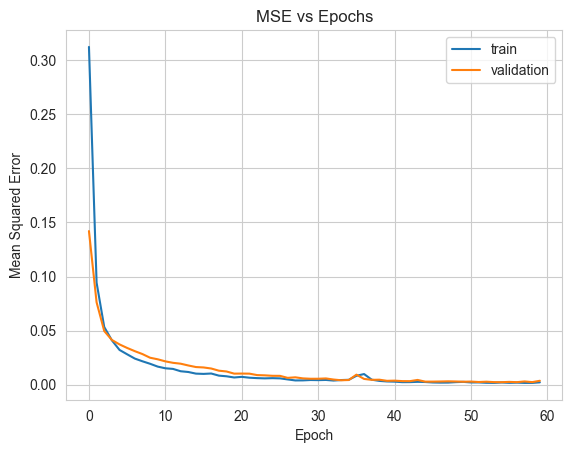

In [ ]:
inputs = keras.layers.Input(shape=(xtrain.shape[1],))
w = keras.layers.Dense(128, activation='relu')(inputs)
w = keras.layers.Dense(128, activation='relu')(w)
w = keras.layers.Dense(8, activation='relu')(w)
output = keras.layers.Dense(1, activation='linear')(w)
model = keras.Model(inputs=inputs, outputs=output, name='MLP1')
model.compile(loss='mse', optimizer='adam', metrics=[keras.metrics.MeanSquaredError(), keras.metrics.R2Score()])
history = model.fit(xtrain, ytrain, epochs=60, batch_size=64, validation_split=0.1, verbose=0)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"MLP1 regression MSE = {mse}")
print(f"MLP1 regression R2 = {r2}")

# Plotting MSE vs Epoch
fig, ax = plt.subplots()
ax.plot(history.history['mean_squared_error'])
ax.plot(history.history['val_mean_squared_error'])
ax.set_title("MSE vs Epochs")
ax.set_xlabel("Epoch")
ax.set_ylabel("Mean Squared Error")
ax.legend(['train', 'validation'], loc='upper right');

Model 2

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MLP2 regression MSE = 0.019637373848226468
MLP2 regression R2 = 0.9817225747127016


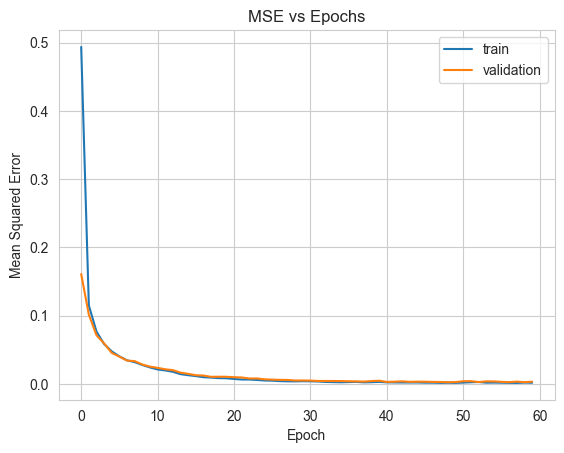

In [ ]:
inputs = keras.layers.Input(shape=(xtrain.shape[1],))
w = keras.layers.Dense(64, activation='relu')(inputs)
w = keras.layers.Dense(64, activation='relu')(w)
w = keras.layers.Dense(64, activation='relu')(w)
w = keras.layers.Dense(64, activation='relu')(w)
w = keras.layers.Dense(8, activation='relu')(w)
output = keras.layers.Dense(1, activation='linear')(w)
model = keras.Model(inputs=inputs, outputs=output, name='MLP2')
model.compile(loss='mse', optimizer='adam', metrics=[keras.metrics.MeanSquaredError(), keras.metrics.R2Score()])
history = model.fit(xtrain, ytrain, epochs=60, batch_size=64, validation_split=0.1, verbose=0)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"MLP2 regression MSE = {mse}")
print(f"MLP2 regression R2 = {r2}")

# Plotting MSE vs Epoch
fig, ax = plt.subplots()
ax.plot(history.history['mean_squared_error'])
ax.plot(history.history['val_mean_squared_error'])
ax.set_title("MSE vs Epochs")
ax.set_xlabel("Epoch")
ax.set_ylabel("Mean Squared Error")
ax.legend(['train', 'validation'], loc='upper right');

Model 3

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MLP3 regression MSE = 0.020586938456960694
MLP3 regression R2 = 0.9808387703748231


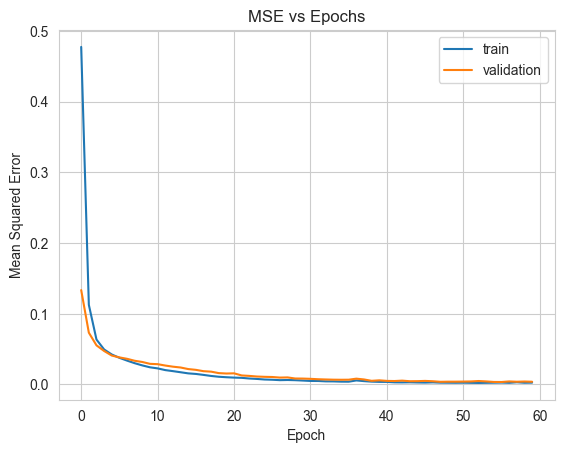

In [ ]:
inputs = keras.layers.Input(shape=(xtrain.shape[1],))
w = keras.layers.Dense(64, activation='relu')(inputs)
w = keras.layers.Dense(256, activation='relu')(w)
output = keras.layers.Dense(1, activation='linear')(w)
model = keras.Model(inputs=inputs, outputs=output, name='MLP3')
model.compile(loss='mse', optimizer='adam', metrics=[keras.metrics.MeanSquaredError(), keras.metrics.R2Score()])
history = model.fit(xtrain, ytrain, epochs=60, batch_size=64, validation_split=0.1, verbose=0)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"MLP3 regression MSE = {mse}")
print(f"MLP3 regression R2 = {r2}")

# Plotting MSE vs Epoch
fig, ax = plt.subplots()
ax.plot(history.history['mean_squared_error'])
ax.plot(history.history['val_mean_squared_error'])
ax.set_title("MSE vs Epochs")
ax.set_xlabel("Epoch")
ax.set_ylabel("Mean Squared Error")
ax.legend(['train', 'validation'], loc='upper right');

Model 4

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MLP4 regression MSE = 0.01864604665523412
MLP4 regression R2 = 0.9826452494473796


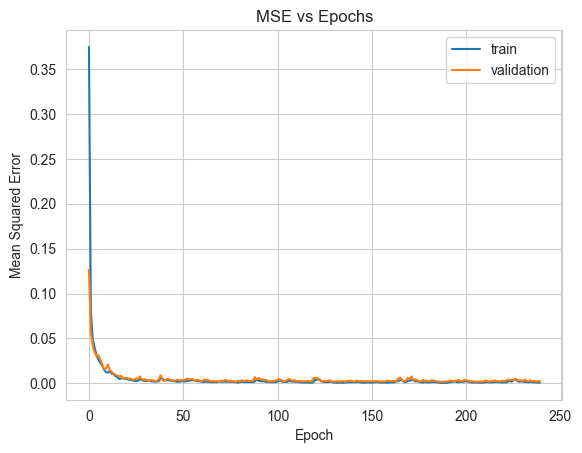

In [ ]:
inputs = keras.layers.Input(shape=(xtrain.shape[1],))
w = keras.layers.Dense(1024, activation='relu')(inputs)
w = keras.layers.Dense(64, activation='relu')(w)
w = keras.layers.Dense(64, activation='relu')(w)
w = keras.layers.Dense(64, activation='relu')(w)
w = keras.layers.Dense(64, activation='relu')(w)
output = keras.layers.Dense(1, activation='linear')(w)
model = keras.Model(inputs=inputs, outputs=output, name='MLP4')
model.compile(loss='mse', optimizer='adam', metrics=[keras.metrics.MeanSquaredError(), keras.metrics.R2Score()])
history = model.fit(xtrain, ytrain, epochs=240, batch_size=64, validation_split=0.1, verbose=0)
preds = model.predict(xtest)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"MLP4 regression MSE = {mse}")
print(f"MLP4 regression R2 = {r2}")

# Plotting MSE vs Epoch
fig, ax = plt.subplots()
ax.plot(history.history['mean_squared_error'])
ax.plot(history.history['val_mean_squared_error'])
ax.set_title("MSE vs Epochs")
ax.set_xlabel("Epoch")
ax.set_ylabel("Mean Squared Error")
ax.legend(['train', 'validation'], loc='upper right');

## Data modeling: PCA 

Number of PCA components used for 70.0% explained variance = 6 out of 17


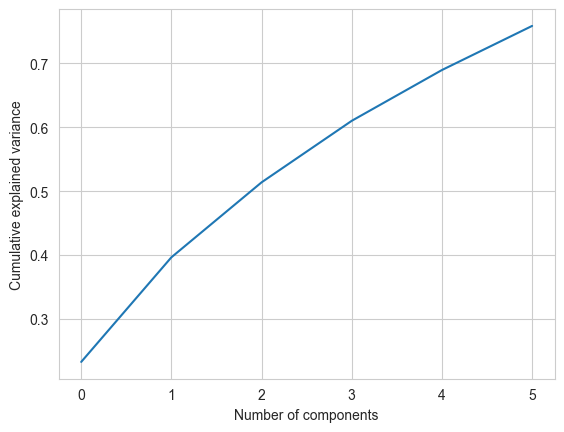

In [144]:
variance_explained = 0.7
pca = PCA(n_components=variance_explained)
xtrain60 = pca.fit_transform(xtrain)
xtest60 = pca.transform(xtest)
print(f"Number of PCA components used for {variance_explained*100}% explained variance = {pca.n_components_} out of {xtrain.shape[1]}")

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Simple linear regression

In [ ]:
model = LinearRegression(n_jobs=-1)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + Simple linear regression MSE = {mse}")
print(f"PCA + Simple linear regression R2 =  {r2}")

PCA + Simple linear regression MSE = 0.1084192974585238
PCA + Simple linear regression R2 =  0.8990890724841744


### PLS regression

In [ ]:
model = PLSRegression(n_components=5)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + PLS regression MSE = {mse}")
print(f"PCA + PLS regression R2 =  {r2}")

PCA + PLS regression MSE = 0.1084192974585238
PCA + PLS regression R2 =  0.8990890724841744


### Lasso regression

In [ ]:
model = Lasso(alpha=0.01)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + Lasso alpha=0.01 regression MSE = {mse}")
print(f"PCA + Lasso alpha=0.01 regression R2 = {r2}")

PCA + Lasso alpha=0.01 regression MSE = 0.10880443928641971
PCA + Lasso alpha=0.01 regression R2 = 0.8987306029128973


In [ ]:
model = Lasso(alpha=0.05)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + Lasso alpha=0.05 regression MSE = {mse}")
print(f"PCA + Lasso alpha=0.05 regression R2 = {r2}")

PCA + Lasso alpha=0.05 regression MSE = 0.1142883775755912
PCA + Lasso alpha=0.05 regression R2 = 0.8936264442236977


In [ ]:
model = Lasso(alpha=0.1)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + Lasso alpha=0.1 regression MSE = {mse}")
print(f"PCA + Lasso alpha=0.1 regression R2 = {r2}")

PCA + Lasso alpha=0.1 regression MSE = 0.12145806405975354
PCA + Lasso alpha=0.1 regression R2 = 0.8869532805888635


In [ ]:
model = Lasso(alpha=0.2)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + Lasso alpha=0.2 regression MSE = {mse}")
print(f"PCA + Lasso alpha=0.2 regression R2 = {r2}")

PCA + Lasso alpha=0.2 regression MSE = 0.13766803990392135
PCA + Lasso alpha=0.2 regression R2 = 0.8718658954481335


In [ ]:
model = Lasso(alpha=0.3)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + Lasso alpha=0.3 regression MSE = {mse}")
print(f"PCA + Lasso alpha=0.3 regression R2 = {r2}")

PCA + Lasso alpha=0.3 regression MSE = 0.16969586719389326
PCA + Lasso alpha=0.3 regression R2 = 0.8420560937439292


In [ ]:
model = Lasso(alpha=0.6)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + Lasso alpha=0.6 regression MSE = {mse}")
print(f"PCA + Lasso alpha=0.6 regression R2 =  {r2}")

PCA + Lasso alpha=0.6 regression MSE = 0.360686457738633
PCA + Lasso alpha=0.6 regression R2 =  0.6642921892504701


In [ ]:
model = Lasso(alpha=1)
model.fit(xtrain60, ytrain)
lasso_preds = model.predict(xtest60)
mse = mean_squared_error(ytest, lasso_preds)
r2 = r2_score(ytest, lasso_preds)


print(f"PCA + Lasso alpha=1 regression MSE = {mse}")
print(f"PCA + Lasso alpha=1 regression R2 =  {r2}")

x_t = np.c_[xtest[:,0], lasso_preds, xtest[:, 1:]]
lasso_preds = scaler.inverse_transform(x_t)
lasso_preds = lasso_preds[:, 1]

PCA + Lasso alpha=1 regression MSE = 0.5782371006887074
PCA + Lasso alpha=1 regression R2 =  0.4618075977029691


### Ridge regression

In [ ]:
model = Ridge()
model.fit(xtrain60, ytrain)
ridge_preds = model.predict(xtest60)
mse = mean_squared_error(ytest, ridge_preds)
r2 = r2_score(ytest, ridge_preds)

print(f"PCA + Ridge regression MSE = {mse}")
print(f"PCA + Ridge regression R2 = {r2}")

x_t = np.c_[xtest[:,0], ridge_preds, xtest[:, 1:]]
ridge_preds = scaler.inverse_transform(x_t)
ridge_preds = ridge_preds[:, 1]

PCA + Ridge regression MSE = 0.10840518866794291
PCA + Ridge regression R2 = 0.8991022041975965


### KNN regression (non-linear)

In [ ]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + KNN k=2 regression MSE = {mse}")
print(f"PCA + KNN k=2 regression R2 = {r2}")

PCA + KNN k=2 regression MSE = 0.024293415926011426
PCA + KNN k=2 regression R2 = 0.9773889778749086


In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + KNN k=3 regression MSE = {mse}")
print(f"PCA + KNN k=3 regression R2 = {r2}")

PCA + KNN k=3 regression MSE = 0.02544515389732189
PCA + KNN k=3 regression R2 = 0.9763170013018766


In [ ]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + KNN k=4 regression MSE = {mse}")
print(f"PCA + KNN k=4 regression R2 = {r2}")

PCA + KNN k=4 regression MSE = 0.02856482316140523
PCA + KNN k=4 regression R2 = 0.9734133787331941


In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(xtrain60, ytrain)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"PCA + KNN k=5 regression MSE = {mse}")
print(f"PCA + KNN k=5 regression R2 = {r2}")

PCA + KNN k=5 regression MSE = 0.031848430016523134
PCA + KNN k=5 regression R2 = 0.9703571717560734


### Neural regression (non-linear)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MLP4 regression MSE = 0.021981978571644443
MLP4 regression R2 = 0.9795403410804591


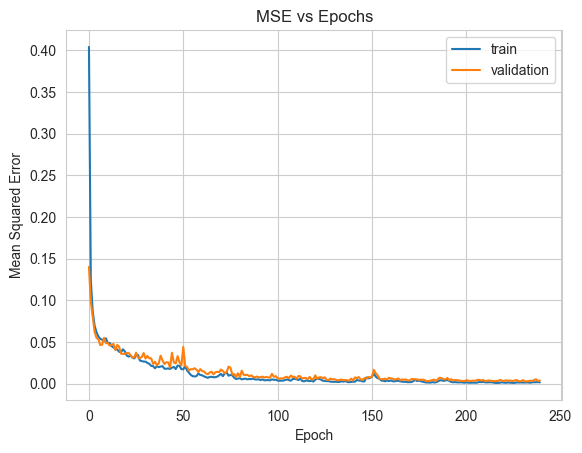

In [ ]:
inputs = keras.layers.Input(shape=(xtrain60.shape[1],))
w = keras.layers.Dense(1024, activation='relu')(inputs)
w = keras.layers.Dense(64, activation='relu')(w)
w = keras.layers.Dense(64, activation='relu')(w)
w = keras.layers.Dense(64, activation='relu')(w)
w = keras.layers.Dense(64, activation='relu')(w)
output = keras.layers.Dense(1, activation='linear')(w)
model = keras.Model(inputs=inputs, outputs=output, name='MLP4')
model.compile(loss='mse', optimizer='adam', metrics=[keras.metrics.MeanSquaredError(), keras.metrics.R2Score()])
history = model.fit(xtrain60, ytrain, epochs=240, batch_size=64, validation_split=0.1, verbose=0)
preds = model.predict(xtest60)
mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)
print(f"MLP4 regression MSE = {mse}")
print(f"MLP4 regression R2 = {r2}")

# Plotting MSE vs Epoch
fig, ax = plt.subplots()
ax.plot(history.history['mean_squared_error'])
ax.plot(history.history['val_mean_squared_error'])
ax.set_title("MSE vs Epochs")
ax.set_xlabel("Epoch")
ax.set_ylabel("Mean Squared Error")
ax.legend(['train', 'validation'], loc='upper right');

## Shapiro - Wilk Test on Residuals

Regression

In [278]:
res_regr = y_pred_regr-ytest
test, pval = shapiro(res_regr)

alpha = 0.05
if test > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
 print(f'Test statistic: {test} \t Pval: {pval}')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Test statistic: 0.9782754778862 	 Pval: 0.0003555600414983928


PLS Regression

In [279]:
res_PLS = y_pred_PLS-ytest
test, pval = shapiro(res_PLS)

alpha = 0.05
if test > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
 print(f'Test statistic: {test} \t Pval: {pval}')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Test statistic: 0.9802531003952026 	 Pval: 0.0007828247034922242


Lasso Regression

In [282]:
res_lasso = y_pred_lasso-ytest
test, pval = shapiro(res_lasso)

alpha = 0.05
if test > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
 print(f'Test statistic: {test} \t Pval: {pval}')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Test statistic: 0.9186258912086487 	 Pval: 4.865281094668106e-11


Ridge Regression

In [283]:
res_ridge = y_pred_lasso-ytest
test, pval = shapiro(res_ridge)

alpha = 0.05
if test > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
 print(f'Test statistic: {test} \t Pval: {pval}')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Test statistic: 0.9186258912086487 	 Pval: 4.865281094668106e-11


## QQ Plots

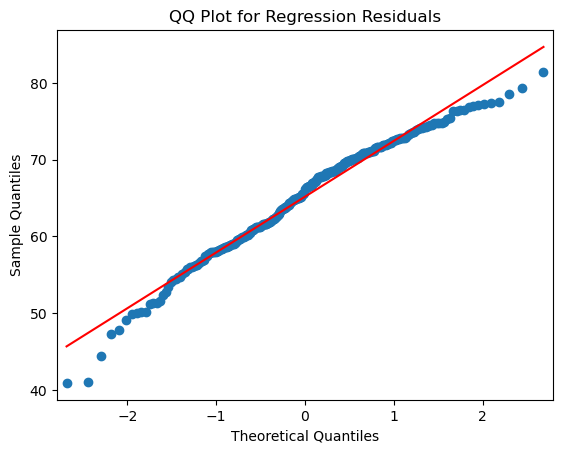

In [284]:
sm.qqplot(res_regr, line ='s') 
pylab.title('QQ Plot for Regression Residuals')
pylab.show()

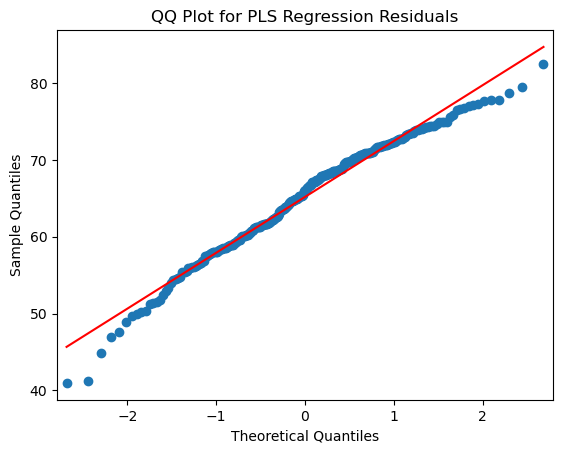

In [285]:
sm.qqplot(res_PLS, line ='s') 
pylab.title('QQ Plot for PLS Regression Residuals')
pylab.show()

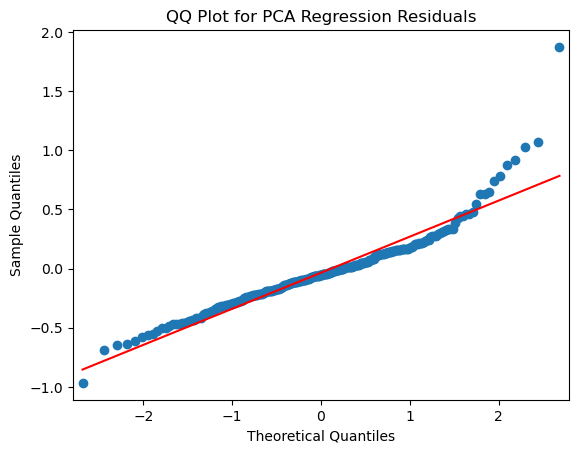

In [286]:
sm.qqplot(res_lasso, line ='s') 
pylab.title('QQ Plot for PCA Regression Residuals')
pylab.show()

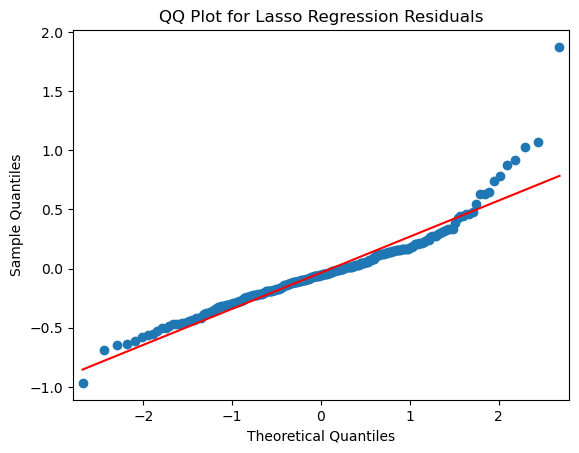

In [287]:
sm.qqplot(res_ridge, line ='s') 
pylab.title('QQ Plot for Lasso Regression Residuals')
pylab.show()